# 量子カーネルSVM

## 線形分離不可能なデータの準備

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# ランダムシードの指定
np.random.seed(1)
# 標準正規分布に従う乱数の生成
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# 真の場合は1、偽の場合は-1
y_xor = np.where(y_xor, 1, -1)

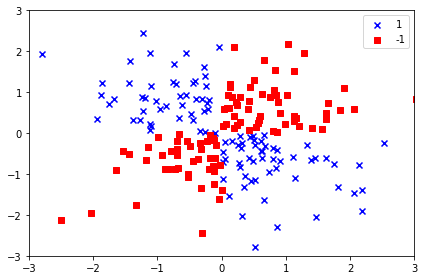

In [2]:
#データのプロット
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 特徴マップ回路の定義

In [3]:
from qiskit.circuit.library import ZZFeatureMap
map_zz = ZZFeatureMap(feature_dimension=2, reps=2)

In [4]:
## カーネルの定義(手組)
from qiskit import BasicAer
from qiskit_machine_learning.kernels import QuantumKernel
from sklearn.svm import SVC

# Create the quantum feature map
map_zz = ZZFeatureMap(feature_dimension=2,
                                 reps=2,
                                 entanglement='linear')
# Create the quantum kernel
adhoc_kernel = QuantumKernel(feature_map=map_zz,
                             quantum_instance=BasicAer.get_backend('statevector_simulator'))

# Set the SVC algorithm to use our custom kernel
model = SVC(kernel=adhoc_kernel.evaluate)
model.fit(X_xor, y_xor)

SVC(kernel=<bound method QuantumKernel.evaluate of <qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7fe818a9baf0>>)

## 量子カーネルSVMモデルのトレーニング

In [5]:
# 決定境界の可視化
from matplotlib.colors import ListedColormap

def plot_decision_regisons(X, y, classifier, resolution=0.2):

  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 決定境界のプロット
  x1_min, x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  # 各特徴量を1次元配列に変換して予測を実行
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  # グリッドポイントの等高線プロット
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolors='black')

<ipython-input-5-dfe2fb02194c>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolors='black')


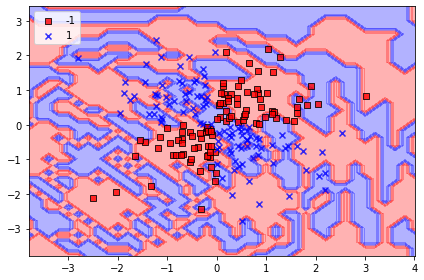

In [6]:
plot_decision_regisons(X_xor, y_xor, classifier=model)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()